# ЗАДАНИЕ 1
Первичный анализ данных с Panda

In [8]:
#Используемые библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [9]:
#Считаем данные по росту и веса
data = pd.read_csv('weights_heights.csv', index_col='Index')

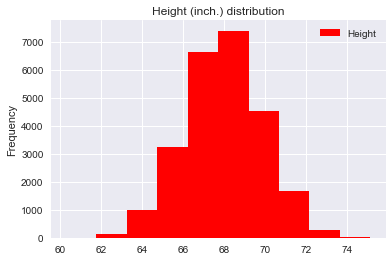

In [10]:
#Гистограмма распределения роста подростков
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [11]:
#Первые пять записей из data
data.head(n=5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


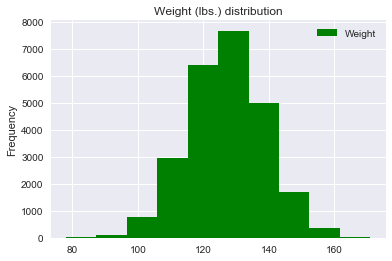

In [12]:
#Гистограмма распределения веса
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (lbs.) distribution')

In [13]:
# Создаем третий признак - индекс массы тела
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [14]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

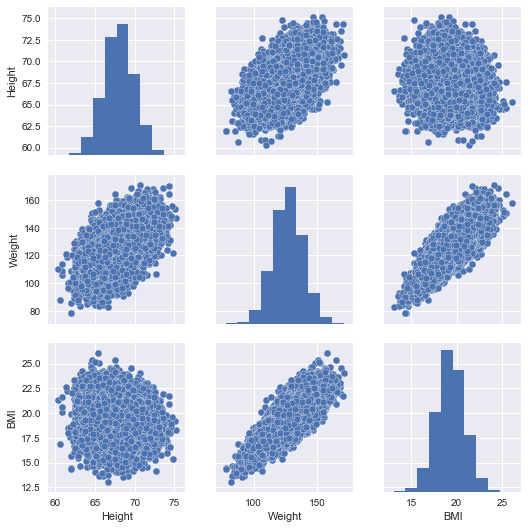

In [15]:
# Отображаем попарные зависимости признаков
sns.pairplot(data)

In [16]:
# Создаем новый признак - весовую категорию
def weight_category(weight):
    if weight < 120:
        return 1
    if weight  >= 150:
        return 3
    return 2
data['weight_category'] = data['Weight'].apply(weight_category)
# Ваш код здесь

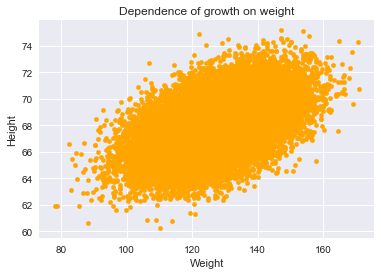

In [17]:
# Зависимость роста от веса. 
# orange for ФИВТ
data.plot(x='Weight', y='Height', kind='scatter', 
           color='orange',title='Dependence of growth on weight')

# Задание 2
Минимизация квадратичной ошибки

In [41]:
# Квадратичная ошибка приближения
def error(w0, w1):
    sum = 0
    size = data.size/4+1   
    while size > 1:
        size -= 1
        y = data['Height'][size]
        x = data['Weight'][size]
        add = (y -(w0+w1*x))*(y -(w0+w1*x))
        sum += add*add
    return sum

# Для графика
def e(w0,w1,x):
    y = (w0+w1*x)
    return y

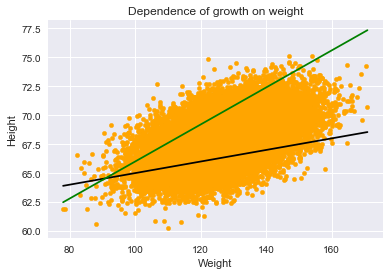

In [19]:
x = np.linspace(min(data.Weight), max(data.Weight), data.Height.size) 
data.plot(x='Weight', y='Height', kind='scatter', 
           color='orange',title='Dependence of growth on weight')
plt.plot(x, e(60, 0.05, x),color = 'black')
plt.plot(x, e(50, 0.16, x),color = 'green')

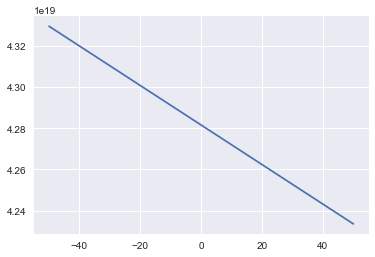

In [43]:
# График зависимость функции ошибки
w = np.linspace(-50,50,2)
plt.plot(w, error(50,w))

In [44]:
# Фиксируем w0 = 50
def erro(w1):
    sum = 0
    size = data.size/4+1   
    while size > 1:
        size -= 1
        y = data['Height'][size]
        x = data['Weight'][size]
        add = y -(50+w1*x)
        sum += add*add
    return sum

res = minimize_scalar(erro)

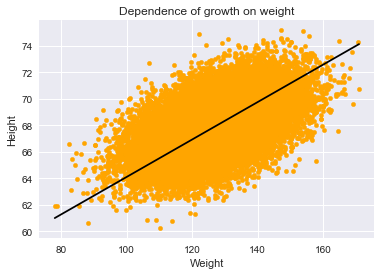

In [45]:
data.plot(x='Weight', y='Height', kind='scatter', 
           color='orange',title='Dependence of growth on weight')
plt.plot(x, e(50, res.x, x),color = 'black')

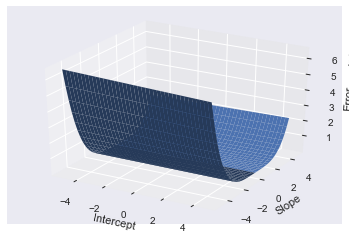

In [46]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = error(X,Y)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [47]:
from scipy.optimize import minimize

k = minimize(err, [0, 0], method='L-BFGS-B', bounds=[(-100,100),(-5,5)])

NameError: name 'err' is not defined

NameError: name 'k' is not defined

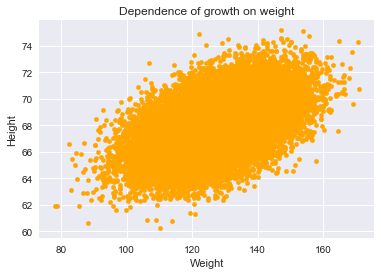

In [25]:
data.plot(x='Weight', y='Height', kind='scatter', 
           color='orange',title='Dependence of growth on weight')
plt.plot(x, e(k.x[0], k.x[1], x),color = 'black')